### **Autoencoder for Noise Reduction**
 **Goal:** Build an autoencoder to reconstruct clean images from noisy ones using the MNIST dataset.

**Load and Preprocess MNIST Data**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Flatten for dense autoencoder
x_train_flat = x_train.reshape((len(x_train), -1))
x_test_flat = x_test.reshape((len(x_test), -1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Add Noise to the Data**

In [3]:
noise_factor = 0.5
x_train_noisy = x_train_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_flat.shape)
x_test_noisy = x_test_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_flat.shape)

# Clip values to keep them in range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

**Build the Autoencoder Model**

In [4]:
input_img = Input(shape=(784,))  # 28x28 image flattened

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)  # Output image with values between 0 and 1

# Full autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

**Train the Model**

In [5]:
autoencoder.fit(
    x_train_noisy, x_train_flat,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test_flat)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3277 - val_loss: 0.1788
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1717 - val_loss: 0.1544
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1516 - val_loss: 0.1407
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1401 - val_loss: 0.1343
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1343 - val_loss: 0.1299
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1301 - val_loss: 0.1268
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1269 - val_loss: 0.1249
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1249 - val_loss: 0.1228
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1232 - val_loss: 0.1217
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1217 - val_loss: 0.1207


**Evaluate and Visualize Denoised Images**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


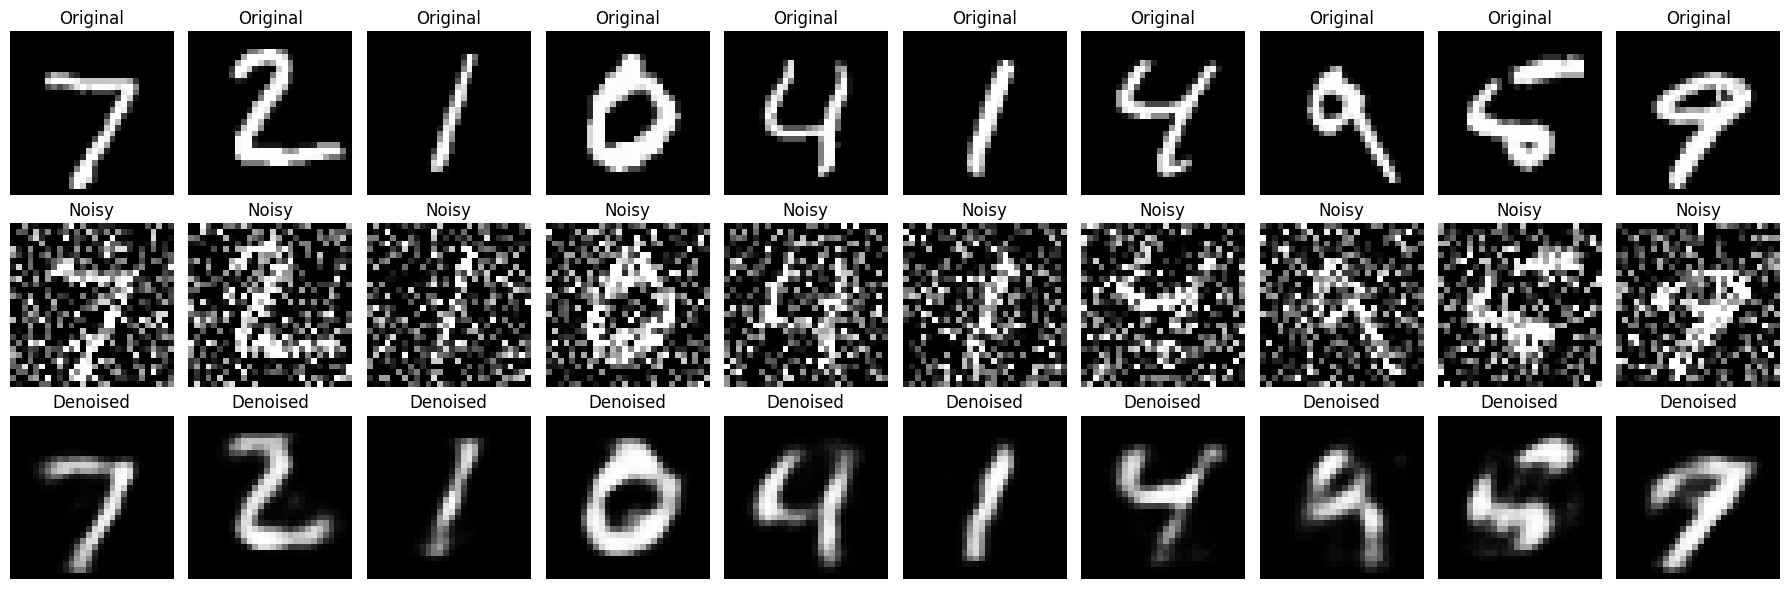

In [6]:
decoded_imgs = autoencoder.predict(x_test_noisy)

# Reshape vectors back to 28x28 images
decoded_imgs = decoded_imgs.reshape((-1, 28, 28))
x_test_noisy_imgs = x_test_noisy.reshape((-1, 28, 28))
x_test_original = x_test_flat.reshape((-1, 28, 28))

# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(18, 6))
for i in range(n):
    # Original
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test_original[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy_imgs[i], cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i], cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.tight_layout()
plt.show()

### **📌Summary**

✅ Loaded the MNIST handwritten digit dataset (28×28 grayscale images).

🔧 Added random noise to simulate corrupted images.

🧠 Built a fully connected autoencoder to learn how to reconstruct clean images from noisy inputs.

🚀 Trained the model using noisy images as input and clean images as target output.

📉 Used binary crossentropy loss and Adam optimizer for training.

🖼️ Visualized original, noisy, and denoised images to evaluate performance.

🧪 No labels were used — this is a pure unsupervised learning task.